In [ ]:
## With VGG19 Multilable Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
### Loding Data

In [ ]:
data_set_path = '/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification'

In [ ]:
train_data_path = '/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Training'
test_data_path = '/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Testing'

In [ ]:
import glob 
from glob import glob 

In [ ]:
## Glob will help us to seen how mant folders are there in a  Folder

In [ ]:
 ##--> /* helps to show how many folders are there in the training folder

In [ ]:

glob('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Training/*') ## /* helps to show how many folders are there in the training folder

['/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Training/NORMAL',
 '/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Training/PNEUMONIA',
 '/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Training/COVID19']

In [ ]:
glob('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Testing/*')

['/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Testing/PNEUMONIA',
 '/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Testing/NORMAL',
 '/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Testing/COVID19']

In [ ]:
## Now Importing Reguired Packages

In [ ]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Making Every Image as same cordinates

In [ ]:
Image_size = [256,256]

In [ ]:
preprocess_train=ImageDataGenerator(rescale=1. /255,
                                 shear_range=0.2,
                                 zoom_range=0.4,
                                 vertical_flip=True,
                                 horizontal_flip=True)

preprocess_test=ImageDataGenerator(rescale=1./255)

In [ ]:
labels=['COVID19','NORMAL','PNEUMONIA']

In [ ]:
train_data=preprocess_train.flow_from_directory(train_data_path,
                                                target_size=[256,256],
                                                class_mode='categorical',
                                                classes=labels,
                                                batch_size=32)
test_data=preprocess_test.flow_from_directory(test_data_path,
                                              target_size=[256,256],
                                              class_mode='categorical',
                                              classes=labels,
                                              batch_size=32)

Found 5215 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
sol=VGG19(input_shape=Image_size + [3] , weights='imagenet' , include_top = False)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
#to make not to update weights of VGG16

for i in sol.layers:
  i.trainable = False

In [ ]:
# developing my own output layer

from tensorflow.keras.layers import Flatten

In [ ]:
y=Flatten()(sol.output)

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import softmax

In [ ]:
from keras.api._v2.keras import activations
final = Dense(3, activation = 'softmax')(y)

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
vgg19_model = Model(sol.inputs, final)

In [ ]:
vgg19_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
vgg19_model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['Accuracy'])

In [ ]:
vgg19_model.fit(train_data , epochs = 1)

163/163 [==============================] - 5034s 31s/step - loss: 0.5124 - Accuracy: 0.8299


In [ ]:
## Checking with Test Data

In [ ]:
test_data.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
y_test_pred=vgg19_model.predict(test_data)

41/41 [==============================] - 1222s 30s/step


In [ ]:
y_test_pred

array([[4.0224474e-03, 4.1647576e-02, 9.5432997e-01],
       [9.9915069e-01, 3.2121167e-04, 5.2799872e-04],
       [7.5812684e-04, 5.1827645e-01, 4.8096538e-01],
       ...,
       [3.1325987e-03, 9.6936327e-01, 2.7504135e-02],
       [2.2674105e-05, 9.9672115e-01, 3.2561622e-03],
       [1.9916395e-02, 6.5824851e-02, 9.1425866e-01]], dtype=float32)

In [ ]:
import cv2

In [ ]:
# create a function to take the image from its path 

def prediction(path):
  # load the image 
  image = plt.imread(path)
#  print(image)
  print(image.shape)
  # since training has be done with 150 , 150 so we need to resize the image into 150,150
  image = cv2.resize(image , (256,256))
  print(image.shape)
  # since the training was done with pixel values after scaling down to 0 - 1 so for test also we need to scale down into 0 - 1
  image = np.array(image) / 255.0
 # print(image)
  # Now we need to make sure convert data into Deep learning CNN trained Manner 
  image = np.expand_dims(image , axis = 0)
  print(image.shape)
  # print(image)
  # Now give the data to trained model
  result = vgg19_model.predict(image)
  print(result)
  sol = np.argmax(result , axis = 1)
  print(sol[0])
  print(labels[sol[0]])
  img = plt.imread(path)
  plt.imshow(img)

In [ ]:
## Predicting Normal Images 

(1383, 1684, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 1s 1s/step
[[6.898503e-04 9.919532e-01 7.356899e-03]]
1
NORMAL


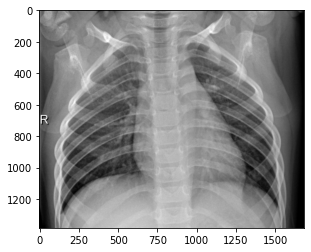

In [ ]:
prediction('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Training/NORMAL/NORMAL(1005).jpg')

(1785, 1735, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 1s 1s/step
[[0.02463845 0.967039   0.00832257]]
1
NORMAL


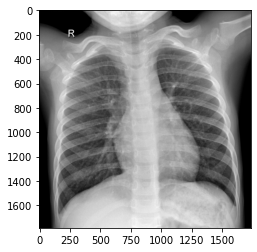

In [ ]:
prediction('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Training/NORMAL/NORMAL(1008).jpg')

In [ ]:
## ## Predicting Covid Images 

(872, 1045, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 1s 1s/step
[[0.95745313 0.03201272 0.01053403]]
0
COVID19


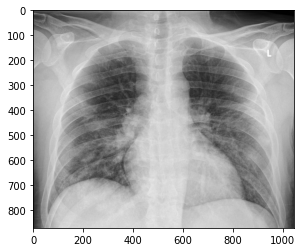

In [ ]:
prediction('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Training/COVID19/COVID19(108).jpg')

(587, 659, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 1s 1s/step
[[9.9629682e-01 3.3849300e-04 3.3646813e-03]]
0
COVID19


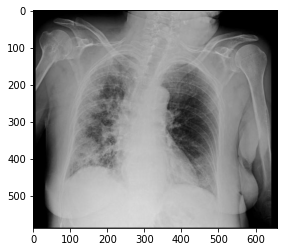

In [ ]:
prediction('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Training/COVID19/COVID19(103).jpg')

In [ ]:
## Predicting PNEUMONIA Images 

(760, 1152, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 1s 1s/step
[[0.01071689 0.0098574  0.9794257 ]]
2
PNEUMONIA


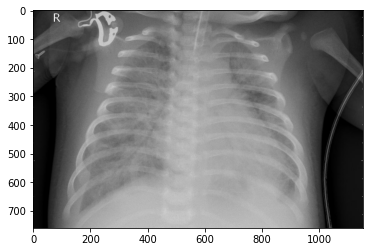

In [ ]:
prediction('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Training/PNEUMONIA/PNEUMONIA(0).jpg')

(760, 1152, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 1s 795ms/step
[[0.01071689 0.0098574  0.9794257 ]]
2
PNEUMONIA


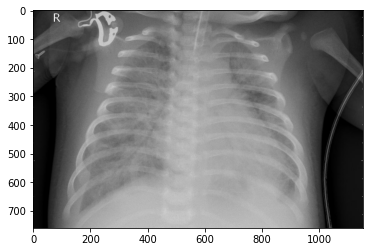

In [ ]:
prediction('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Training/PNEUMONIA/PNEUMONIA(0).jpg')